In [1]:
"""
Importing Libraries
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_multilabel_classification

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
"""
Importing the models
"""
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [3]:
pwd

'/Users/shankar'

In [4]:
"""
Reading the column data from the respective .csv files that contains the Text and respective label.
This model works on all kinds of Text data that was labeled properly according to the text. 
We just need to change the name of the file that was given as an input.
"""
df1 = pd.read_csv("/Users/shankar/Data/Project/BBC News Train.csv")  #BBC News Train #Huff Post
df2 = pd.read_csv("/Users/shankar/Data/Project/Huff Post.csv")
frames=[df1,df2]
df= pd.concat(frames)
df["Category"] = df["Category"].str.lower()
df = df[['Text','Category']]
df

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business
...,...,...
5440,Spain scooped up its first Winter Olympics med...,sports
5441,U.S. figure skater Adam Rippon nailed his rout...,sports
5442,Republicans trotted out the same old meaningle...,comedy
5443,Jamaica’s women’s bobsled team will have a sle...,sports


In [5]:
"""
Displaying the labels w.r.t the Text and passing it as an input to 
1. Generate the list to visualize the category count
2. Generate the dictionaries to map 
    a. the label to integer.
    b. the predicicted outcome to the corresponding label.
"""
df['Category']

0       business
1       business
2       business
3           tech
4       business
          ...   
5440      sports
5441      sports
5442      comedy
5443      sports
5444    politics
Name: Category, Length: 6935, dtype: object

In [6]:
"""
Displaying the categories w.r.t their count
"""
df['category_id'] = df['Category'].factorize()[0]
category_list = df.groupby('Category').category_id.count()
category_list

Category
black voices      290
business          392
comedy            305
crime             136
education          26
entertainment    1394
impact             55
latino voices      13
media             174
politics         2299
queer voices      290
religion           39
science            28
sport             346
sports            178
tech              301
travel             55
weird news        133
women             140
world news        341
Name: category_id, dtype: int64

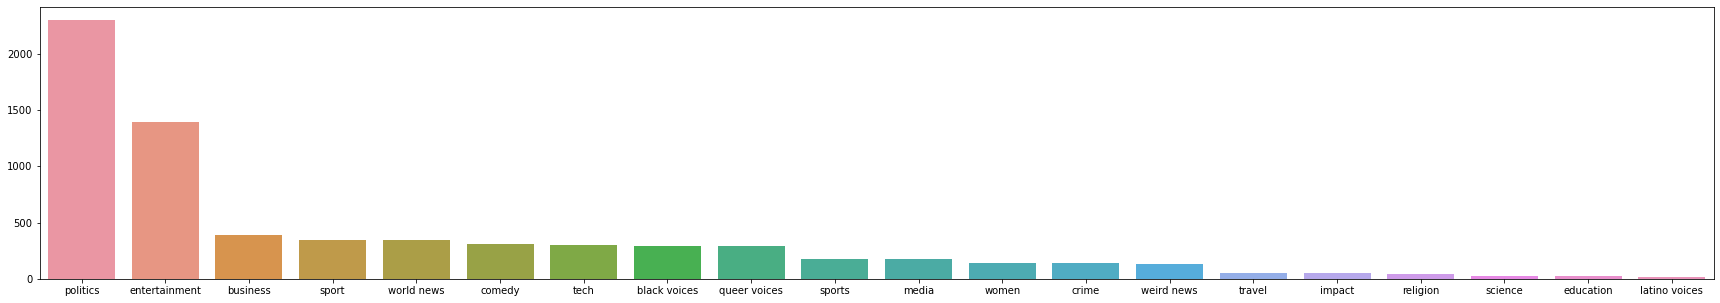

In [7]:
"""
Visualizing the label count
"""
category = df['Category'].value_counts()
plt.figure(figsize=(30, 5))
sns.barplot(category.index, category.values);

In [8]:
df = pd.read_csv("/Users/shankar/Data/Project/Balanced_Data.csv")
df = df[['Text','Category']]
df

,Text,Category
0,- via Getty Images People help to rescue injur...,world news
1,. @mirandadevine : Having now met @realDonaldT...,media
2,". @secupp just now on @HLNTV : ""I for one hope...",media
3,‚Äú Black Panther ‚Äù has solidified its place...,black voices
4,‚Äú Black Panther ‚Äù has solidified its place...,black voices
...,...,...
5395,Yuri Gripas / Reuters U.S. Deputy Attorney Gen...,crime
5396,Yuri Gripas / Reuters U.S. Deputy Attorney Gen...,crime
5397,Yvonne Orji knows what she wants and knows how...,black voices
5398,Zendaya knows how important it is to use your ...,black voices


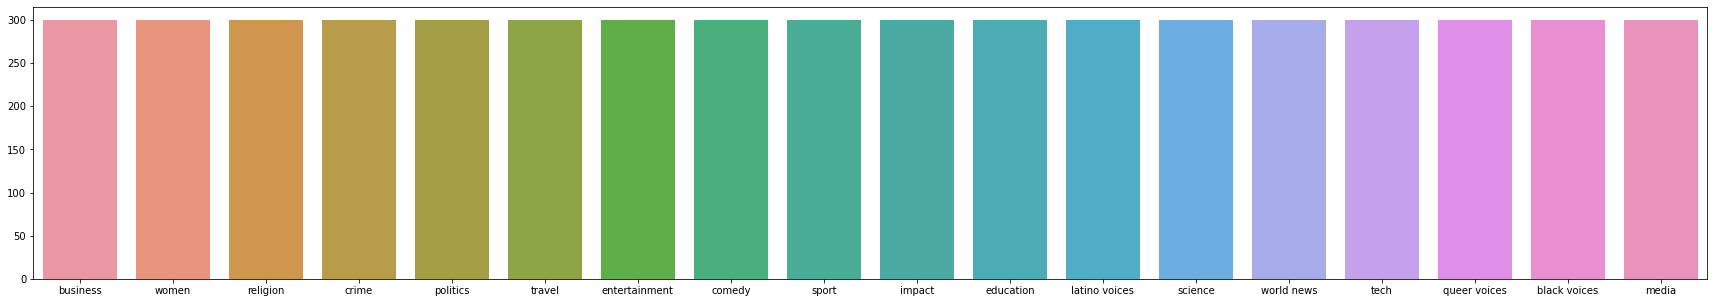

In [9]:
"""
Visualizing the label count
"""
df['category_id'] = df['Category'].factorize()[0]
category = df['Category'].value_counts()
plt.figure(figsize=(30, 5))
sns.barplot(category.index, category.values);

In [10]:
"""
Using term frequency and inverse document frequency to generate the features w.r.t the stopwords present in the text.
"""
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2),
                        stop_words='english')

In [11]:
"""
Generating the features
"""
features = tfidf.fit_transform(df.Text).toarray()
features

array([[0.        , 0.03838305, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02354213, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
"""
Generating the labels for the respective text
"""
labels = df.category_id
labels

0       0
1       1
2       1
3       2
4       2
       ..
5395    4
5396    4
5397    2
5398    2
5399    6
Name: category_id, Length: 5400, dtype: int64

In [13]:
"""
Generating a list of available categories to pass this an input to generate dictionary
"""
list = df['Category'].values
list

array(['world news', 'media', 'media', ..., 'black voices',
       'black voices', 'politics'], dtype=object)

In [14]:
"""
Populating the 2 dictionaries
    a. the label to integer.
    b. the predicicted outcome to the corresponding label.
"""
category_to_id_dict = {}
id_to_category_dict = {}

i=0
for word in list:
      if not word in category_to_id_dict:
            category_to_id_dict.update({word:i})
            id_to_category_dict.update({i:word})
            i=i+1
category_to_id_dict

{'world news': 0,
 'media': 1,
 'black voices': 2,
 'entertainment': 3,
 'crime': 4,
 'comedy': 5,
 'politics': 6,
 'women': 7,
 'queer voices': 8,
 'latino voices': 9,
 'religion': 10,
 'education': 11,
 'science': 12,
 'tech': 13,
 'business': 14,
 'sport': 15,
 'travel': 16,
 'impact': 17}

In [15]:
id_to_category_dict

{0: 'world news',
 1: 'media',
 2: 'black voices',
 3: 'entertainment',
 4: 'crime',
 5: 'comedy',
 6: 'politics',
 7: 'women',
 8: 'queer voices',
 9: 'latino voices',
 10: 'religion',
 11: 'education',
 12: 'science',
 13: 'tech',
 14: 'business',
 15: 'sport',
 16: 'travel',
 17: 'impact'}

In [16]:
"""
Forming a list of model to pass as an input and check performance of each model w.r.t another
"""
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    KNeighborsClassifier(n_neighbors=3),
    MultinomialNB(),
    LogisticRegression(random_state=0)
]

In [17]:
"""
Calculating the cross-validation score for each model
"""
entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=4)
    for i, accuracy in enumerate(accuracies):
        entries.append((model_name, i, accuracy))

In [18]:
"""
Populating the entries into a Data Frame
"""
entries
cv_df = pd.DataFrame(entries, columns=['model_name', 'Cross-Validation-Set', 'accuracy'])
cv_df

,model_name,Cross-Validation-Set,accuracy
0,RandomForestClassifier,0,0.558519
1,RandomForestClassifier,1,0.614815
2,RandomForestClassifier,2,0.600741
3,RandomForestClassifier,3,0.580741
4,KNeighborsClassifier,0,0.611852
5,KNeighborsClassifier,1,0.636296
6,KNeighborsClassifier,2,0.657778
7,KNeighborsClassifier,3,0.677778
8,MultinomialNB,0,0.643704
9,MultinomialNB,1,0.648148


<AxesSubplot:xlabel='model_name', ylabel='accuracy'>

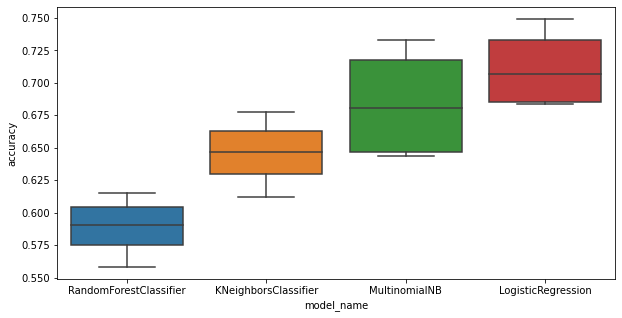

In [19]:
"""
Plotting the results of model (vs) cross_validation_accuracy
"""
plt.figure(figsize=(10, 5))
sns.boxplot('model_name', 'accuracy', data=cv_df)

In [20]:
"""
Modeling the RandomForestClassifier
"""
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [21]:
"""
Spliting the input data into training and testing data
"""
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

In [22]:
"""
Modeling
"""
model = LogisticRegression(max_iter=1000)

In [23]:
"""
Fitting the model
"""
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
"""
predicting the testing data
"""
y_pred = model.predict(X_test)
y_pred

array([16,  9,  1, 15,  4, 15, 11,  5, 14, 10,  3, 17,  1,  2,  6, 10, 11,
       11,  5, 17, 14, 17,  7,  5,  9,  4,  9, 13,  1, 16,  2, 13, 14,  6,
       12,  7, 11, 15,  0,  2, 11, 13,  0, 12,  6, 15,  5,  6,  1,  8,  9,
       16,  4,  5, 17,  8, 11, 15,  5,  5,  8,  6,  0,  7,  3,  2,  7, 10,
       10,  1, 12, 14, 10,  3, 17, 13, 15,  5,  8,  7,  1,  0,  7, 14,  7,
       16, 13,  9, 15,  0, 12,  6, 12, 13,  2,  4,  6, 14,  6, 15, 11, 17,
       10, 17,  7, 15,  2, 14,  9,  5, 10, 13,  3, 10, 12, 12,  5, 15, 15,
       10, 10,  3,  1, 11, 10,  2,  6, 12, 15, 17,  7, 15, 13,  5, 10,  8,
       12,  0, 16, 15, 15, 16,  8, 15, 11,  4, 15, 16,  9,  7,  9,  3, 10,
       15,  7, 10, 13, 10, 16,  1,  5,  4,  3, 16, 16,  9,  6,  9,  7,  8,
        6,  7, 10,  7, 15, 10,  4,  6,  0, 17, 16,  0,  7,  7,  7, 10, 16,
        2,  9, 15, 16,  4, 11,  0,  6,  2,  7, 15, 17,  4,  6,  5, 15,  2,
        7,  5, 14, 12,  4, 17, 14, 17,  8,  9,  4,  2, 14, 16,  8, 17,  7,
       16, 17,  3,  5, 10

In [25]:
"""
Evaluating the performance metrics of the model
"""
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8907407407407407

In [26]:
cm_array = confusion_matrix(y_test, y_pred)
cm_array

array([[19,  0,  0,  0,  1,  0,  1,  2,  0,  0,  1,  0,  0,  0,  1,  0,
         0,  0],
       [ 0, 25,  0,  1,  0,  2,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0, 23,  3,  2,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 1,  0,  3, 16,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  1,  0, 26,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  1,  0,  2,  0, 19,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0],
       [ 2,  1,  2,  0,  1,  1, 26,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0],
       [ 2,  0,  0,  2,  0,  0,  1, 26,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0],
       [ 0,  0,  0,  2,  1,  0,  2,  1, 26,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 31,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  

<AxesSubplot:>

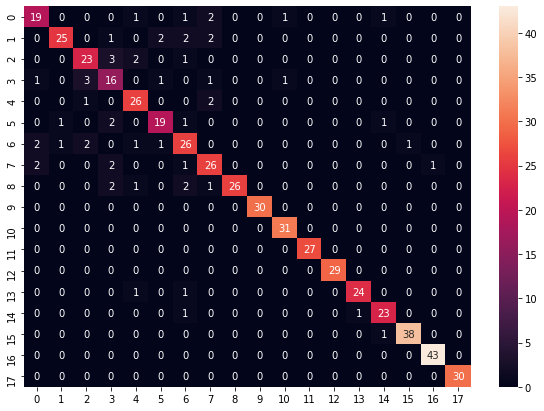

In [27]:
df_cm = pd.DataFrame(cm_array, index = range(len(category_to_id_dict)),
                  columns = range(len(category_to_id_dict)))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [28]:
precision_metric = precision_score(y_test, y_pred, average = "macro")
precision_metric

0.8881798190550554

In [29]:
recall_metric = recall_score(y_test, y_pred, average = "macro")
recall_metric

0.8847425440434634

In [30]:
f1_metric = f1_score(y_test, y_pred, average = "macro")
f1_metric

0.8851189883288046

In [31]:
"""
Selecting a block of text to predict it's category
"""
text = df.at[800,"Text"]
text

'An Alabama teenager says he had visions of walking with God after a traumatic brain injury pushed him to the brink of death.\r\n\r\nTrenton McKinley, a 13-year-old from Mobile, claims he remembers walking through an open field with a shadowy, bearded figure during an apparent near-death experience. The teen said the vision proved to him that God is real.\r\n\r\n‚ÄúThere is no other explanation but God,‚Äù McKinley told WALA-TV in a May 7 article about his dramatic recovery. ‚ÄúThere‚Äôs no other way that I could have come back.\r\n\r\nNear Death Experiences (NDEs) like the one McKinley describes are a subject debated among researchers. Some are convinced that NDEs have a scientific explanation. The visions could be caused by a spike in neural activity in the brain as it approaches death, for example.\r\n\r\nBut many of those who have experienced NDEs aren‚Äôt satisfied with a scientific explanation, saying that the spiritual nature of such moments are too numerous and widespread to di

In [32]:
"""
Generating the features
"""
test_features = tfidf.transform([text])

In [33]:
"""
Predicting the label
"""
prediction = model.predict(test_features)

In [34]:
"""
Printing the label
"""
for i in range(len(prediction)):
    print(id_to_category_dict[prediction[i]])

religion


In [35]:
import joblib

In [36]:
joblib.dump(model,'Classification.joblib')

['Classification.joblib']